In [35]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from sklearn.decomposition import PCA
import altair as alt, seaborn as sns
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [36]:
!ls *.npy

exp1_rastrigin.npy  exp2_rastrigin.npy  exp3_rastrigin.npy  exp4_rastrigin.npy
exp1_rosenbrock.npy exp2_rosenbrock.npy exp3_rosenbrock.npy exp4_rosenbrock.npy
exp1_sphere.npy     exp2_sphere.npy     exp3_sphere.npy     exp4_sphere.npy


In [37]:
functions = ['sphere','rastrigin','rosenbrock']

In [38]:
def plot_function(func):
    exps = sorted([o.stem for o in Path().glob(f'*{func}*.npy')]) # retrieving file names
    source_data = []
    for exp in exps: source_data.append(pd.DataFrame(np.load(exp+'.npy')).assign(name=exp)) # reading files
    df_source = pd.concat(source_data) # putting all files together in a pandas dataframe
    d = df_source.iloc[:,:30] # grabs the values (30 dim)
    pca = PCA(1) # initialize PCA
    d_pca = pca.fit_transform(d) # reduces dimentions to 1
    dd = df_source.name.to_frame() # grabs from df_source only the names of experiments
    dd['value'] = d_pca[:,0] # adds the reduced dimentions to dd
    plot_data = dd.copy() # putting the data in format to plot
    plot_data['time'] = np.repeat(np.arange(100)[None], len(exps), 0).reshape(-1) # add time values 

    fig,axs = plt.subplots(len(exps), 1, figsize=(8,1.5*len(exps))) # plot figures
    for exp,ax in zip(exps,axs): 
        t = plot_data.query(f"name=={exp!r}")
        ax.plot(t['time'], t['value'] ,'o-', label=exp)
        ax.set_title(exp)
    plt.tight_layout()

In [44]:
def plot_function_with_best(func):
    exps = sorted([o.stem for o in Path().glob(f'*{func}*.npy')]) # retrieving file names
    source_data = []
    for exp in exps: source_data.append(pd.DataFrame(np.load(exp+'.npy')).assign(name=exp)) # reading files
    df_source = pd.concat(source_data) # putting all files together in a pandas dataframe
    d = df_source.iloc[:,:30] # grabs the values (30 dim)
    pca = PCA(1) # initialize PCA
    d_pca = pca.fit_transform(d) # reduces dimentions to 1
    dd = df_source.name.to_frame() # grabs from df_source only the names of experiments
    dd['value'] = d_pca[:,0] # adds the reduced dimentions to dd
    plot_data = dd.copy() # putting the data in format to plot
    plot_data['time'] = np.repeat(np.arange(100)[None], len(exps), 0).reshape(-1) # add time values 

    fig,axs = plt.subplots(len(exps), 2, figsize=(14,1.5*len(exps))) # plot figures
    for exp,ax,best_ax in zip(exps,axs[:,0],axs[:,1]): 
        t = plot_data.query(f"name=={exp!r}")
        ax.plot(t['time'], t['value'] ,'o-', label=exp)
        ax.set_title(exp)
        best_file = Path(f"../../data/results/{exp.split('_')[0]}/{func}/best_known.csv")
        best_values = np.asarray(pd.read_csv(best_file).fitness)
        best_ax.plot(best_values,'o-', label=exp)
        best_ax.set_title(f'best {exp}')
    plt.tight_layout()
    return pca

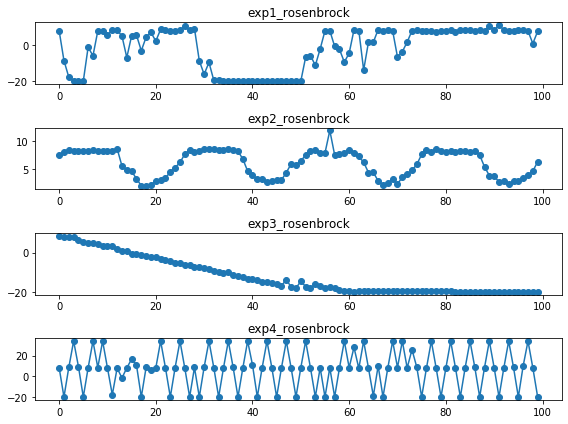

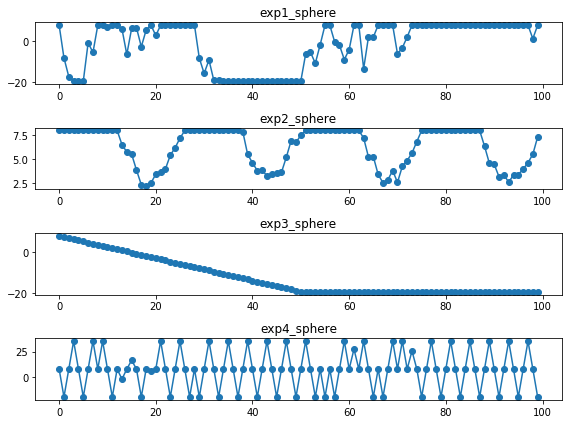

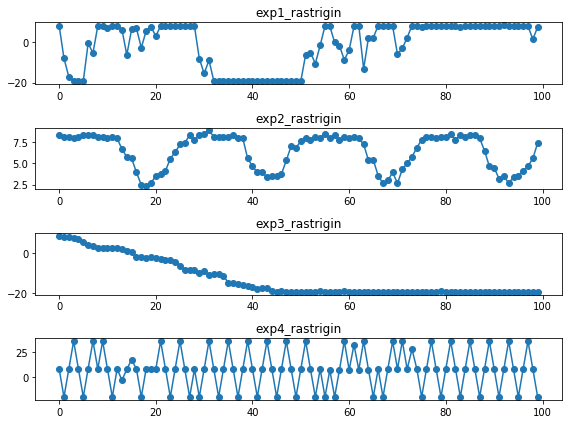

In [51]:
plot_function('rosenbrock')
plot_function('sphere')
plot_function('rastrigin')

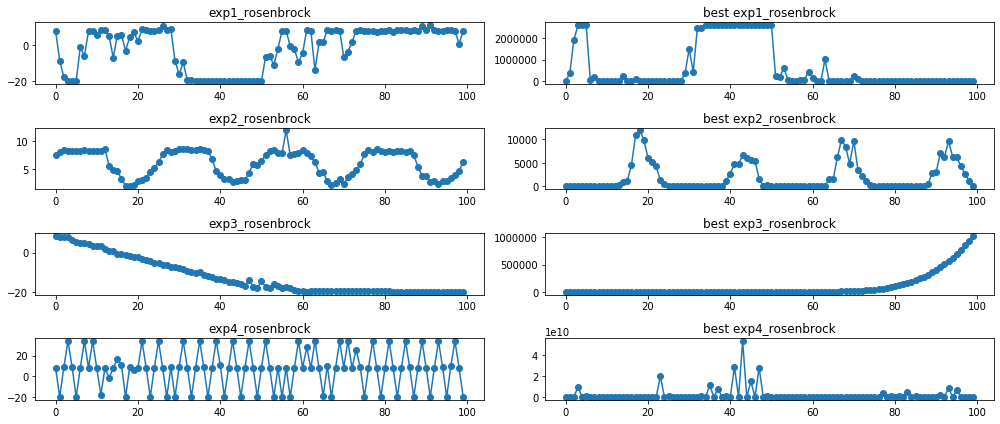

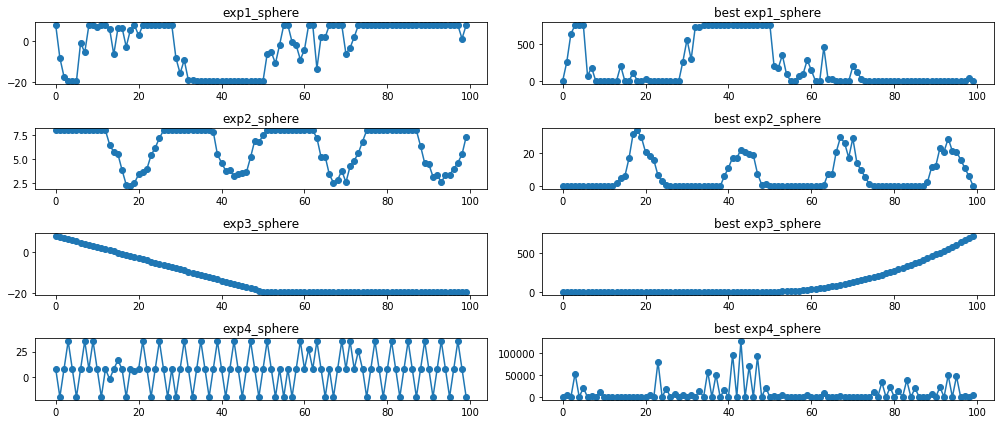

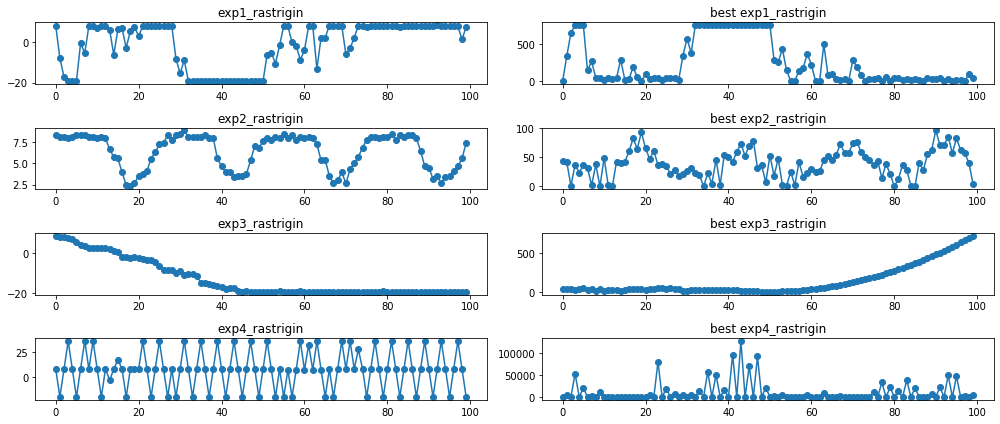

In [53]:
pcas = [plot_function_with_best('rosenbrock'),
        plot_function_with_best('sphere'),
        plot_function_with_best('rastrigin')]

In [57]:
pca.explained_variance_ratio_

array([0.94667554])

In [60]:
[o.explained_variance_ratio_ for o in pcas]


[array([0.94667554]), array([0.99997404]), array([0.98585868])]